## 3.2.6 Famous Nonlinear Oscillators

In [3]:
# Import the rk4 method from a different file
from RungeKutta.rk4Algo import dsbRK4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

plt.style.use('seaborn-v0_8-bright')
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.autolayout"] = True
plt.rcParams['lines.linewidth'] = 0.75

### van der Pool Equation

The nonlinear behavior of vacuum tubes and metronomes is described by the <b>van der Pool Equation</b>

<b><i>What is the van der Pool Equation?</i></b>

This equation is represented by:

\begin {equation}
    \frac{d^2x}{dt^2} + \mu(x^2-x_0^2)\frac{dx}{dt} +\omega_0^2x=0
\end{equation}

It can be thought of as having a position dependent damping because the velocity term in the equation is referred to as the damping term. Since the damping coefficient is dependent on the position, then it's a position dependent damping coefficient.

Now, let's make the model for the van der Pool

In [4]:
def Pool(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system. It represents the van der Pool equation.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    #creates an array of velocities to store the system of First order ODEs
    v = np.empty([y.size])
    ## This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    v[0] = y[1]
    v[1] = -(w0**2)*y[0] - mu*(y[0]**2 - x0*22)*y[1]

    return v

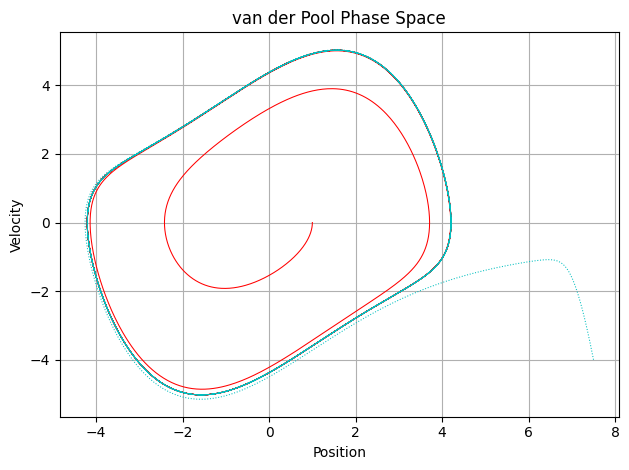

In [5]:
mu, x0, w0 = 0.16, 0.2, 1
pool1 = dsbRK4([1,0], Pool, 2, 5000, 1/100)
pool2 = dsbRK4([7.5, -4], Pool, 2, 5000, 1/100)

plt.plot(pool1[0][0], pool1[0][1], 'r-')
plt.plot(pool2[0][0], pool2[0][1], 'c:')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('van der Pool Phase Space')
plt.show()

Looking at the phase plots, this equation produces limit cycles in phase space.

## Duffing Oscillator

it's another example of a damped, driven nonlinear oscillator described by the differential eqution:

\begin{equation}
\frac{d^2x}{dt^2} = -2\gamma \frac{dx}{dt} - \alpha x - \beta x^3 + F \cos(\omega t)
\end{equation}

Let's implement this into our code

In [6]:
def duffing(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system. It represents the van der Pool equation.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    #creates an array of velocities to store the system of First order ODEs
    v = np.empty([y.size])
    ## This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    v[0] = y[1]
    v[1] = -2*gamma*y[1] - alpha*y[0] - beta*(y[0]**3) + F*np.cos(omega*t)

    return v

The model was verified to give us the simple harmonic oscillator when all the correct parameters were chosen.

The code below replicates Figure 3.6 in the text. 

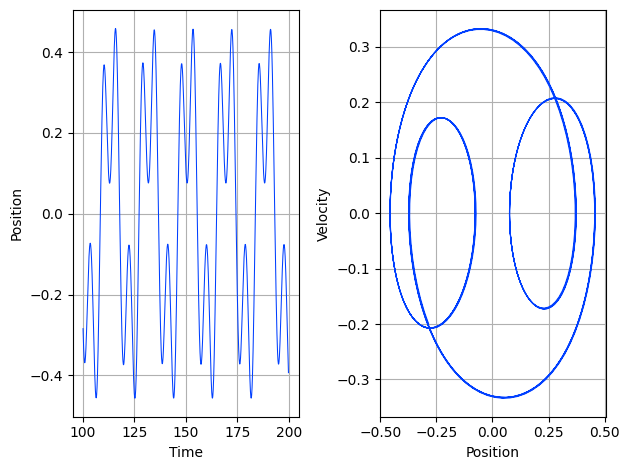

In [7]:
gamma, alpha, beta, F, omega = 0.04, 0, 1, 0.2, 1
duff1 = dsbRK4([0.009,0], duffing, 2, 2000, 1/10)

fig, ax = plt.subplots(1,2)

ax[0].plot(duff1[1][1000:], duff1[0][0][1000:])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Position')

ax[1].plot(duff1[0][0][1000:], duff1[0][1][1000:])
ax[1].set_xlabel('Position')
ax[1].set_ylabel('Velocity')

plt.show()

This oscillator is highly nonlinear because $\alpha = 0 $ and $\beta$ is nonzero.

## Lorenz Attractor

Let's try to model the Lorenz attractor developed by Rosseler

\begin{align}
    &\dot{x} = -y - z, \quad \dot{y} = x+ay,\quad \dot{z} = b + xz- cz\\
    &(a,b,c) = (0.2, 0.2, 5.7)
\end{align}

https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor

In [8]:
def lorenz(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system. It represents the van der Pool equation.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    #creates an array of velocities to store the system of First order ODEs
    v = np.empty([y.size])
    ## This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    v[0] = -y[1]-y[2]
    v[1] = y[0] + a * y[1]
    v[2] = b + (y[0]-c)*y[2]

    return v

In [57]:
a,b,c= 0.2, 0.2, 5.7
lor1 = dsbRK4([1,2,1], lorenz, 3, 50000, 1/1000)
t= lor1[1]
x = lor1[0][0]
y = lor1[0][1]
z = lor1[0][2]

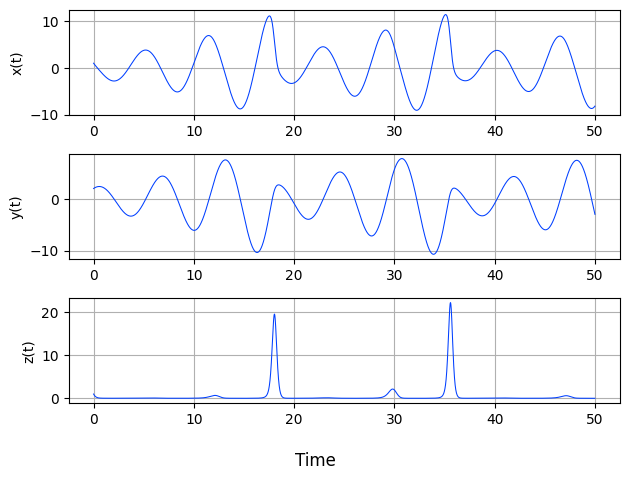

In [60]:
lorFig, lorAx = plt.subplots(3,1)

lorAx[0].plot(t, x)
lorAx[0].set_ylabel('x(t)')

lorAx[1].plot(t, y)
lorAx[1].set_ylabel('y(t)')

lorAx[2].plot(t, z)
lorAx[2].set_ylabel('z(t)')

lorFig.supxlabel('Time')
plt.show()

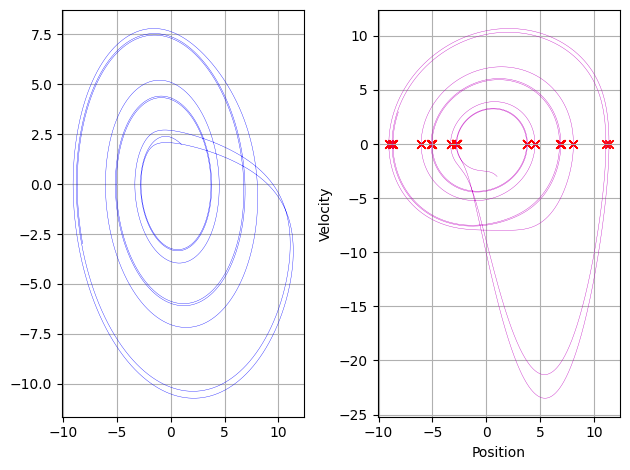

In [67]:
size = lor1[0][0].size
xdot = np.empty([size])

for i in range(0,size):
    xdot[i] = - y[i] - z[i]

pos_xdot = []

for i in range(0, size):
    if abs(xdot[i]) <= 0.1:
        pos_xdot.append(x[i])

proj, pax = plt.subplots(1,2)

pax[0].plot(x, y, 'b', linewidth = 0.25)

pax[1].plot(x, xdot,'m', linewidth = 0.25)
pax[1].scatter(pos_xdot, np.zeros(len(pos_xdot)), color = 'red', marker = 'x')
pax[1].set_xlabel('Position')
pax[1].set_ylabel('Velocity')

plt.show()

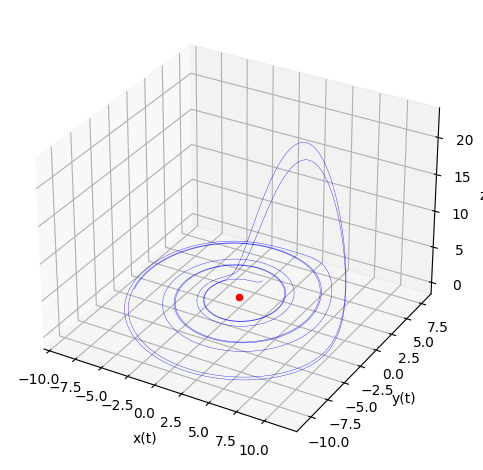

In [65]:
lor3d = plt.axes(projection = "3d")

lor3d.plot3D(lor1[0][0], lor1[0][1], lor1[0][2], 'b', linewidth = 0.25)
lor3d.scatter3D(0,0,0 , color='red')

lor3d.set_xlabel('x(t)')
lor3d.set_ylabel('y(t)')
lor3d.set_zlabel('z(t)')
plt.show()